In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticks


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


# Part 1

In [4]:
df_big = df[df['SizeRank'].isin([0,1,2,3])]
df_big

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
df_big = df_big.drop(columns=['SizeRank','RegionType','StateName','CountyName','Metro','RegionID'])
df_big

,RegionName,State,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,New York,NY,253690.0,255517.0,257207.0,260310.0,263204.0,266206.0,269324.0,272045.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,Los Angeles,CA,234181.0,234401.0,235513.0,237589.0,240113.0,242421.0,244805.0,247479.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,Houston,TX,109068.0,109079.0,108878.0,108881.0,108834.0,109066.0,109287.0,109631.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,Chicago,IL,166139.0,166536.0,167368.0,168826.0,170499.0,172008.0,173598.0,175282.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [6]:
df_melt = pd.melt(df_big,id_vars=['RegionName','State'])
df_melt

,RegionName,State,variable,value
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [7]:
df_melt = df_melt.rename(columns={'variable':'Date','RegionName':'City'})
df_melt

,City,State,Date,value
0,New York,NY,2000-01-31,253690.0
1,Los Angeles,CA,2000-01-31,234181.0
2,Houston,TX,2000-01-31,109068.0
3,Chicago,IL,2000-01-31,166139.0
4,New York,NY,2000-02-29,255517.0
...,...,...,...,...
1087,Chicago,IL,2022-08-31,315587.0
1088,New York,NY,2022-09-30,781622.0
1089,Los Angeles,CA,2022-09-30,966595.0
1090,Houston,TX,2022-09-30,272639.0


In [8]:
df_melt['Date'] = pd.to_datetime(df_melt['Date'])
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    1092 non-null   object        
 1   State   1092 non-null   object        
 2   Date    1092 non-null   datetime64[ns]
 3   value   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 34.2+ KB


In [9]:
df_melt = df_melt.set_index("Date")
df_melt

,City,State,value
Date,,,
2000-01-31,New York,NY,253690.0
2000-01-31,Los Angeles,CA,234181.0
2000-01-31,Houston,TX,109068.0
2000-01-31,Chicago,IL,166139.0
2000-02-29,New York,NY,255517.0
...,...,...,...
2022-08-31,Chicago,IL,315587.0
2022-09-30,New York,NY,781622.0
2022-09-30,Los Angeles,CA,966595.0


In [10]:
# resample for monthly frequences and grouped by city
df_ts = df_melt.groupby('City').resample("M").sum()
df_ts

value
City     Date                
Chicago  2000-01-31  166139.0
         2000-02-29  166536.0
         2000-03-31  167368.0
         2000-04-30  168826.0
         2000-05-31  170499.0
...                       ...
New York 2022-05-31  768797.0
         2022-06-30  773944.0
         2022-07-31  777692.0
         2022-08-31  779960.0
         2022-09-30  781622.0

[1092 rows x 1 columns]

# Part 2

In [11]:
# level 0 is RegionName
df_ts.index.get_level_values(0)

Index(['Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago',
       ...
       'New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York'],
      dtype='object', name='City', length=1092)

In [12]:
# level 1 is Date
df_ts.index.get_level_values(1)

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

In [13]:
unstacked = df_ts.unstack(level=0)
unstacked

value                                
City         Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

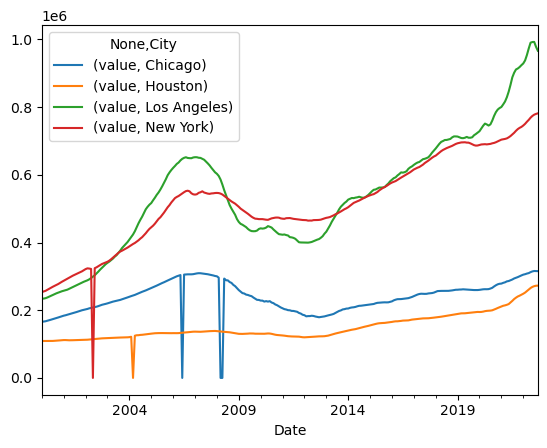

In [14]:
ax = unstacked.plot()

In [15]:
unstacked.columns

MultiIndex([('value',     'Chicago'),
            ('value',     'Houston'),
            ('value', 'Los Angeles'),
            ('value',    'New York')],
           names=[None, 'City'])

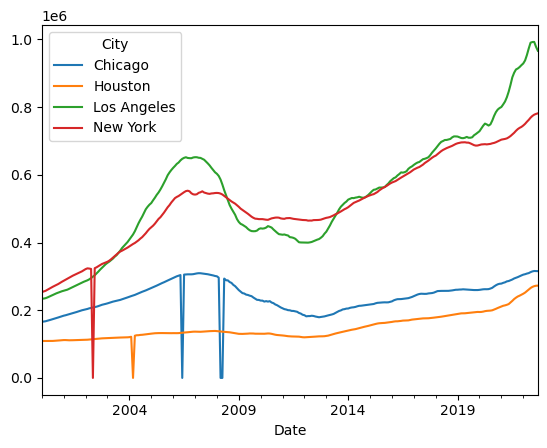

In [16]:
ax = unstacked['value'].plot()

In [18]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

In [22]:
fig,(ax) = df_ts(unstacked)
## Set the axis' major formatter
ax2.yaxis.set_major_formatter(fmt_thous)

TypeError: 'DataFrame' object is not callable

In [24]:
max_value = df_ts['value'].idxmax()
max_value

('Los Angeles', Timestamp('2022-07-31 00:00:00', freq='M'))

ConversionError: Failed to convert value(s) to axis units: ('Los Angeles', Timestamp('2022-07-31 00:00:00', freq='M'))

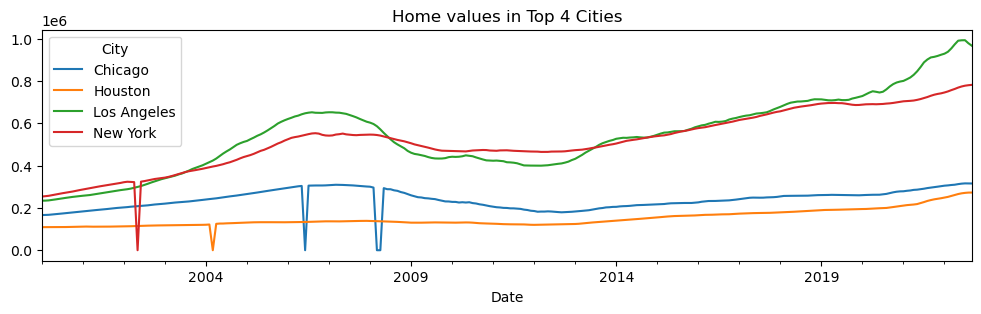

In [28]:
ax = unstacked['value'].plot(figsize=(12,3))
ax.set(title='Home values in Top 4 Cities', ylabel='')
fmt = "%m/%Y"
ax.axvline(max_value, ls='--', color='r',
          label= f'Home values {max_value}')
ax.legend();

# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")

## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(rotation=90)(figsize=(12,3))